In [28]:
import pickle

def l2norm(list1, list2):
    l2_norm_difference = sum((x - y) ** 2 for x, y in zip(list1, list2)) ** 0.5
    l2_norm_reference = sum(y**2 for y in list1) ** 0.5
    return l2_norm_difference / l2_norm_reference

data = {}
name = {"$lambda$-MR": "$\lambda$-MR", "Light Sampling": "IPSS", "Comb-Shapley": "MC-Shapley"}

model = "lstmtraj_model"
dataset = "chengdu"
for cnum in [3, 6, 10]:
    with open(f"/code/Shapley-Data-Valuation/sources/expres/{model}_{cnum}_{dataset}_same.res", "rb") as f:
        result = pickle.load(f)
    exact = result["Comb-Shapley"][0]
    data[cnum] = {}
    for alg, alg_result in result.items():
        data[cnum][name.get(alg, alg)] = (alg_result[1], l2norm(exact, alg_result[0]))

data[10]["IPSS"] = (data[10]["IPSS"][0], 0.15032049395762056)

data

{3: {'MC-Shapley': (427.1534651685506, 0.0),
  'Perm-Shapley': (1848.1124614663422, 0.0),
  'Extended-TMC': (203.32200295850635, 1.428614287608741),
  'OR': (81.56509828567505, 0.937901385275604),
  '$\\lambda$-MR': (144.6638485826552, 0.7327784894302347),
  'Extended-GTB': (334.51789188571274, 1.0),
  'DIG-FL': (213.66269378364086, 0.9602353848362487),
  'CC-Shapley': (230.82849058136344, 1.0120233171589905),
  'IPSS': (213.49077138490975, 0.05134671151815831),
  'GTG-Shapley': (198.10031339898705, 1.4054186288179)},
 6: {'MC-Shapley': (3081.110389230773, 0.0),
  'Perm-Shapley': (396202.27006852627, 4.328272288669188e-15),
  'Extended-TMC': (334.67054850421846, 2.5292479896069615),
  'OR': (638.7820144016296, 0.9721512443500505),
  '$\\lambda$-MR': (635.7047050464898, 0.28632239287585487),
  'Extended-GTB': (429.8911407776177, 1.0),
  'DIG-FL': (338.0180349331349, 0.45668797690596863),
  'CC-Shapley': (395.42444410547614, 1.1450388879830342),
  'IPSS': (300.9590689316392, 0.1493204939

In [29]:
import matplotlib.pylab as plt

plt.style.use("ggplot")
plt.rcParams['axes.prop_cycle']
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.rm"] = "Times New Roman"

algs = ["Perm-Shapley", "MC-Shapley", "DIG-FL", "Extended-GTB", "CC-Shapley", "Extended-TMC", "GTG-Shapley", "OR", "$\lambda$-MR", "IPSS"]
colors = ["#FFFF00", "#8EBA42", "#8EBA42", "#FFB5B8", "#E24A33", "#348ABD", "#1F77b4", "#FF7F0E", "#2CA02C", "#D62728"]
hatchs = ["", "", "xx", "..", "//", "\\\\", "//", "**", "++", "oo"]

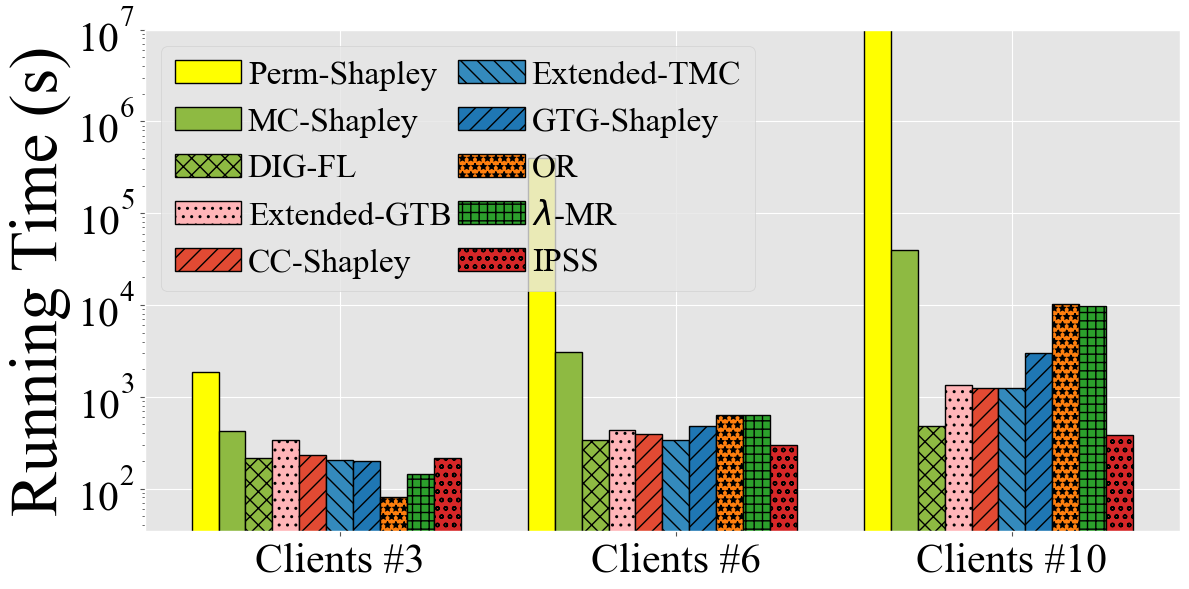

In [30]:
import numpy as np
import matplotlib.pyplot as plt

cnums = [3, 6, 10]
x = [0, 1, 2]
w = 0.08
index = [i for i in range(len(algs))]

fontsize = 30
plt.figure(figsize=(12, 6))

for k, cnum in enumerate(cnums):
    for i, idx in enumerate(index):
        alg, color, hatch = algs[idx], colors[idx], hatchs[idx]
        b = i - len(index) // 2
        plt.bar(x[k] + b * w, data[cnum][alg][0], width=w, label=alg if k == 0 else None, color=color, hatch=hatch, edgecolor="k", linewidth=1)

plt.yscale("log")
plt.ylim(top=1e7)
plt.ylabel("Running Time (s)", fontsize=fontsize * 1.6, color="black")
plt.xticks(x, [f"Clients #{cnum}" for cnum in cnums], fontsize=fontsize, color="black")
plt.yticks(fontsize=fontsize, color="black")
plt.legend(ncol=2, loc="upper left", fontsize=fontsize * 0.8, columnspacing=0.2, handletextpad=0.2, handlelength=2)

plt.tight_layout()
plt.show()

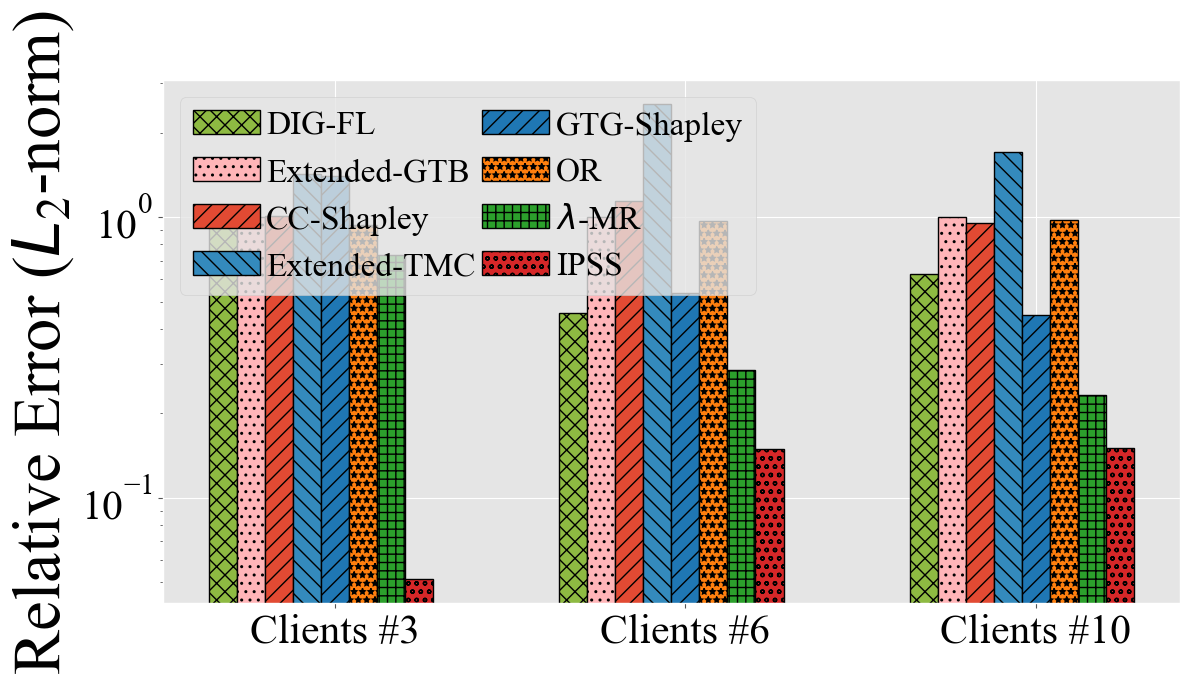

In [31]:
import numpy as np
import matplotlib.pyplot as plt

cnums = [3, 6, 10]
x = [0, 1, 2]
w = 0.08
index = [i for i in range(2, len(algs))]

fontsize = 30
plt.figure(figsize=(12, 6))

for k, cnum in enumerate(cnums):
    for i, idx in enumerate(index):
        alg, color, hatch = algs[idx], colors[idx], hatchs[idx]
        b = i - len(index) // 2
        plt.bar(x[k] + b * w, data[cnum][alg][1], width=w, label=alg if k == 0 else None, color=color, hatch=hatch, edgecolor="k", linewidth=1)

plt.yscale("log")
plt.ylabel("Relative Error ($L_{2}$-norm)", fontsize=fontsize * 1.6, color="black")
plt.xticks(x, [f"Clients #{cnum}" for cnum in cnums], fontsize=fontsize, color="black")
plt.yticks(fontsize=fontsize, color="black")
plt.legend(ncol=2, loc="upper left", fontsize=fontsize * 0.8, columnspacing=0.2, handletextpad=0.2, handlelength=2)

plt.tight_layout()
plt.show()